In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

In [23]:
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("train_housing_prices.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
data=data._get_numeric_data()

In [25]:
data.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [26]:
data=data.drop(columns=['Id','LotFrontage','GarageYrBlt','MasVnrArea'])

In [28]:
X=data.drop(columns=['SalePrice'])
y=data['SalePrice']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1022, 33) (1022,)
Test set: (438, 33) (438,)


# 3NN sin escalar (mal)

In [30]:
knn = KNeighborsRegressor(3) # creo el obj/cajita
# modleo=LinearRegression()
knn.fit(X_train, y_train) # entreno con el fit, se ha guardado X_train y y_train


KNeighborsRegressor(n_neighbors=3)

In [31]:
yhat = knn.predict(X_test)
print("R2: ", r2_score(y_test, yhat))

R2:  0.5751273449927936


In [32]:
yhat_train = knn.predict(X_train)
print("R2 train: ", r2_score(y_train, yhat_train))

R2 train:  0.8459650662793851


# ahora escalamos primero

In [33]:
from sklearn.preprocessing import StandardScaler
objeto_escalador = StandardScaler() # creo el objeto escalador, escalara el dataframe
objeto_escalador.fit(X_train) # le enseñamos la estructura de columnas(33 columnas) y la media y varianza de las 33 columnas

StandardScaler()

In [34]:
objeto_escalador.transform(X_train)

array([[-0.86452516,  0.61692812,  1.371755  , ..., -0.09018379,
         0.61475401, -0.60484875],
       [-0.86452516, -0.26642491, -1.52181282, ..., -0.09018379,
         1.35477593, -0.60484875],
       [-0.86452516, -0.3726873 , -1.52181282, ..., -0.09018379,
        -0.1252679 , -0.60484875],
       ...,
       [ 0.56670278, -0.09015435, -0.07502891, ..., -0.09018379,
         0.61475401, -0.60484875],
       [-0.86452516, -0.41219191, -1.52181282, ..., -0.09018379,
        -0.1252679 ,  0.13545715],
       [-0.86452516, -0.19354141,  0.64836304, ..., -0.09018379,
        -0.49527885,  1.61606894]])

In [38]:
#X_train[:] # selecciono los valores

In [39]:
X_train[:] = objeto_escalador.transform(X_train)
X_test[:] = objeto_escalador.transform(X_test)
# sobreescrivo los valores
# X_train = ... esto sobreescrivira el objeto X_train
# el escalador se hace fit con train y se aplica a train y test

In [13]:
# otra forma de hacerlo sería:
# scaled = objeto_escalador.transform(X_train)
# scaled_data = pd.DataFrame(scaled, columns=X_train.columns)
# scaled_test = objeto_escalador.transform(X_test)
# scaled_test = pd.DataFrame(scaled_test, columns=X_test.columns)

In [43]:
X_train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1403,-0.864525,0.616928,1.371755,-0.499405,1.162617,1.075168,1.075316,-0.290606,-0.060948,0.932291,...,1.329595,0.582613,1.717883,-0.356888,-0.112515,-0.269831,-0.069245,-0.090184,0.614754,-0.604849
1314,-0.864525,-0.266425,-1.521813,0.431967,-0.616218,-1.488895,0.646804,-0.290606,-0.809846,-0.257105,...,-0.892503,-0.762649,-0.158519,-0.356888,-0.112515,-0.269831,-0.069245,-0.090184,1.354776,-0.604849
900,-0.864525,-0.372687,-1.521813,0.431967,-0.045648,-0.666460,-0.245021,-0.290606,-0.105001,-0.456445,...,1.001437,-0.762649,-0.703280,-0.356888,-0.112515,-0.269831,-0.069245,-0.090184,-0.125268,-0.604849
654,-0.864525,0.014483,1.371755,0.431967,0.759862,0.494626,2.743682,-0.290606,-0.375926,2.314383,...,1.728072,1.127124,-0.007196,-0.356888,-0.112515,-0.269831,-0.069245,-0.090184,0.614754,0.135457
650,0.089627,-0.274551,0.648363,0.431967,1.162617,1.075168,-0.945430,-0.290606,0.505132,-0.556115,...,0.429504,-0.762649,-0.703280,-0.356888,-0.112515,-0.269831,-0.069245,-0.090184,-0.495279,0.135457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,2.475007,-0.994260,-0.798421,0.431967,-0.079211,-0.714838,0.718586,-0.290606,-1.285617,-0.662430,...,-0.142428,-0.762649,-0.158519,-0.356888,-0.112515,-0.269831,-0.069245,-0.090184,-0.495279,0.875763
920,0.089627,-0.232421,-0.075029,-0.499405,0.726299,0.446247,0.825170,-0.290606,-1.034516,-0.301403,...,0.002899,1.639605,0.613227,-0.356888,-0.112515,-0.269831,-0.069245,-0.090184,0.244743,-0.604849
849,0.566703,-0.090154,-0.075029,1.363339,0.122166,0.446247,-0.945430,-0.290606,-0.122622,-1.187359,...,0.195106,0.142200,0.809947,-0.356888,-0.112515,-0.269831,-0.069245,-0.090184,0.614754,-0.604849
1020,-0.864525,-0.412192,-1.521813,-0.499405,1.095491,0.978411,1.281958,-0.290606,-1.047732,0.150435,...,-0.090860,1.255244,0.265185,-0.356888,-0.112515,-0.269831,-0.069245,-0.090184,-0.125268,0.135457


In [66]:
knn_esc = KNeighborsRegressor(1) # creo el obj/cajita
# k es un hiperparametro
knn_esc.fit(X_train, y_train) # entreno con el fit

KNeighborsRegressor(n_neighbors=1)

In [67]:
yhat = knn_esc.predict(X_test)
print("R2 test: ", r2_score(y_test, yhat))

R2 test:  0.4812809265165068


In [68]:
yhat_train = knn_esc.predict(X_train)
print("R2 train: ", r2_score(y_train, yhat_train))

R2 train:  1.0


##### Ejercicio: Cuando entrenamos un modelo con test y train, el test sirve para tener una mejor métrica "objetiva" del modelo. Repite el modelo con $N$ diferentes train test set para tener más metricas. Después piensa la mejor forma de utilizar esas metricas

In [83]:
k=10
L=[]
for i in range(10):
    # division de train test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    # escalado
    scaler = StandardScaler()
    scaler.fit(X_train) # los ajusto siempre al train
    X_train[:] = scaler.transform(X_train)
    X_test[:] = scaler.transform(X_test)
    # modelo
    modelo = KNeighborsRegressor(k)
    modelo.fit(X_train, y_train)
    yhat = modelo.predict(X_test)
    L.append(r2_score(y_test, yhat))
L

[0.8076771369162785,
 0.7619408500109298,
 0.7734147171720662,
 0.7642061999580064,
 0.697001306696262,
 0.7440023767735241,
 0.7733900285476338,
 0.7372466295258686,
 0.7903685925945378,
 0.763707858387154]

In [84]:
np.mean(L)

0.7612955696582262

In [85]:
np.var(L) # nos indica si varia mucho de un modelo a otro
# 0.003

0.0008315505700105044

#### Haz la función calcula_knn que divida el dataset en train y test y haga un modelo knn de k vecinos

In [86]:
def calcula_knn(X, y, k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    # escalado
    scaler = StandardScaler()
    scaler.fit(X_train) # los ajusto siempre al train
    X_train[:] = scaler.transform(X_train)
    X_test[:] = scaler.transform(X_test)
    # modelo
    modelo = KNeighborsRegressor(k)
    modelo.fit(X_train, y_train)
    yhat = modelo.predict(X_test)
    return r2_score(y_test, yhat)

In [88]:
L=[]
for i in range(10):
    L.append(calcula_knn(X,y,3))
L

[0.7555912477064897,
 0.7731206862553097,
 0.6745378746242765,
 0.7301118109629916,
 0.7982286675833751,
 0.7746925434914556,
 0.7275306172063938,
 0.7303518059280623,
 0.7765197490226261,
 0.7916101066716654]

In [102]:
def repite_N_modelos(X, y, k, N):
    L=[]
    for i in range(N):
        L.append(calcula_knn(X,y,k))
    return L

In [103]:
repite_N_modelos(X,y,13,10)

[0.7850832536339016,
 0.7567779463064712,
 0.7366584450867848,
 0.8035278094103573,
 0.7630788668642833,
 0.7927289317298436,
 0.7336541617031926,
 0.7834232077982684,
 0.7468990556007986,
 0.7167923944618515]

# Para varias Ks (Busqueda de hiperparametros)

##### Ejercicio: Busca la mejor k

In [106]:
medias=[]
varianzas=[]
for k in range(1,30):
    L = repite_N_modelos(X,y,k,10)
    media = np.mean(L)
    varianza = np.var(L)
    # pongo los resultados en las listas
    medias.append(media)
    varianzas.append(varianza)
    print(k, 'vecinos media r2_score =', media, "---- varianza =", varianza)

1 vecinos media r2_score = 0.6195209741373803 ---- varianza = 0.004239462244830778
2 vecinos media r2_score = 0.7065863851862293 ---- varianza = 0.0014371270630108538
3 vecinos media r2_score = 0.7291019212656271 ---- varianza = 0.0016911425281875875
4 vecinos media r2_score = 0.7496012871803306 ---- varianza = 0.0003858599744268942
5 vecinos media r2_score = 0.7390605563068404 ---- varianza = 0.0034471606822112817
6 vecinos media r2_score = 0.7681589034370797 ---- varianza = 0.0012589657189291765
7 vecinos media r2_score = 0.7626577255873599 ---- varianza = 0.00043734788893849783
8 vecinos media r2_score = 0.7726845382893527 ---- varianza = 0.00040256543623815456
9 vecinos media r2_score = 0.742703450979381 ---- varianza = 0.0015873515106208306
10 vecinos media r2_score = 0.7655408081164048 ---- varianza = 0.001123866664408699
11 vecinos media r2_score = 0.7634902903052376 ---- varianza = 0.0011767337271068753
12 vecinos media r2_score = 0.7642086081286983 ---- varianza = 0.0008917994

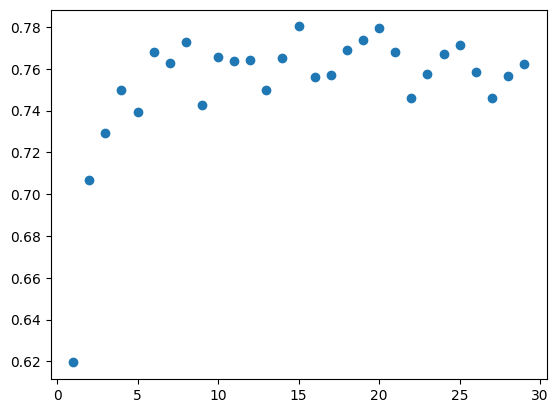

In [107]:
plt.plot(np.arange(1,30),medias, 'o')
plt.show()

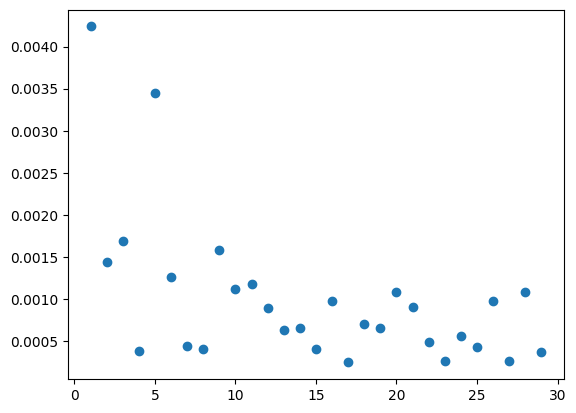

In [108]:
plt.plot(np.arange(1,30),varianzas, 'o')
plt.show()